In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
import pandas as pd
import os
import seaborn as sns

In [4]:
os.chdir("../")
%pwd

'r:\\Real_time_route_optimization'

In [7]:
df = pd.read_csv("artifacts/Data/dataset.csv")

In [8]:
df.head()

,ID,Delivery_person_Age,Delivery_person_Ratings,translogi_latitude,translogi_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,City,Temperature,Traffic_Index,Time_taken
0,0x4607,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,Sunny,High,2,motorcycle,0.0,Urban,29.0,1.200000,24
1,0xb379,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,Stormy,Jam,2,scooter,1.0,Metropolitian,20.0,2.200000,33
2,0x5d6d,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,Sandstorms,Low,0,motorcycle,1.0,Urban,36.0,0.433333,26
3,0x7a6a,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,Sunny,Medium,0,motorcycle,1.0,Metropolitian,30.0,0.700000,21
4,0x70a2,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,Cloudy,High,1,scooter,1.0,Metropolitian,24.0,3.000000,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_Age          43739 non-null  float64
 2   Delivery_person_Ratings      43685 non-null  float64
 3   translogi_latitude           45593 non-null  float64
 4   translogi_longitude          45593 non-null  float64
 5   Delivery_location_latitude   45593 non-null  float64
 6   Delivery_location_longitude  45593 non-null  float64
 7   Order_Date                   45593 non-null  object 
 8   Time_Orderd                  43862 non-null  object 
 9   Weatherconditions            44977 non-null  object 
 10  Road_traffic_density         44992 non-null  object 
 11  Vehicle_condition            45593 non-null  int64  
 12  Type_of_vehicle              45593 non-null  object 
 13  multiple_deliver

In [10]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,translogi_latitude,translogi_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Temperature,Traffic_Index,Time_taken
count,43739.000000,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,44600.000000,45593.000000,45593.000000,45593.000000
mean,29.567137,4.633780,17.017729,70.231332,17.465186,70.845702,1.023359,0.744664,24.576470,1.464067,26.294607
std,5.815155,0.334716,8.185109,22.883647,7.335122,21.118812,0.839065,0.572473,5.980597,1.206447,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,16.000000,0.166667,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,20.000000,0.500000,19.000000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000,23.000000,1.066667,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,30.000000,2.066667,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,36.000000,6.533333,54.000000


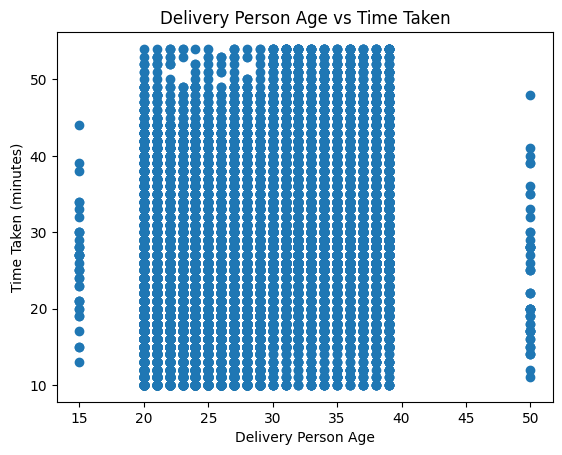

In [12]:
plt.scatter(df['Delivery_person_Age'], df['Time_taken'])
plt.title('Delivery Person Age vs Time Taken')
plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (minutes)')
plt.show()

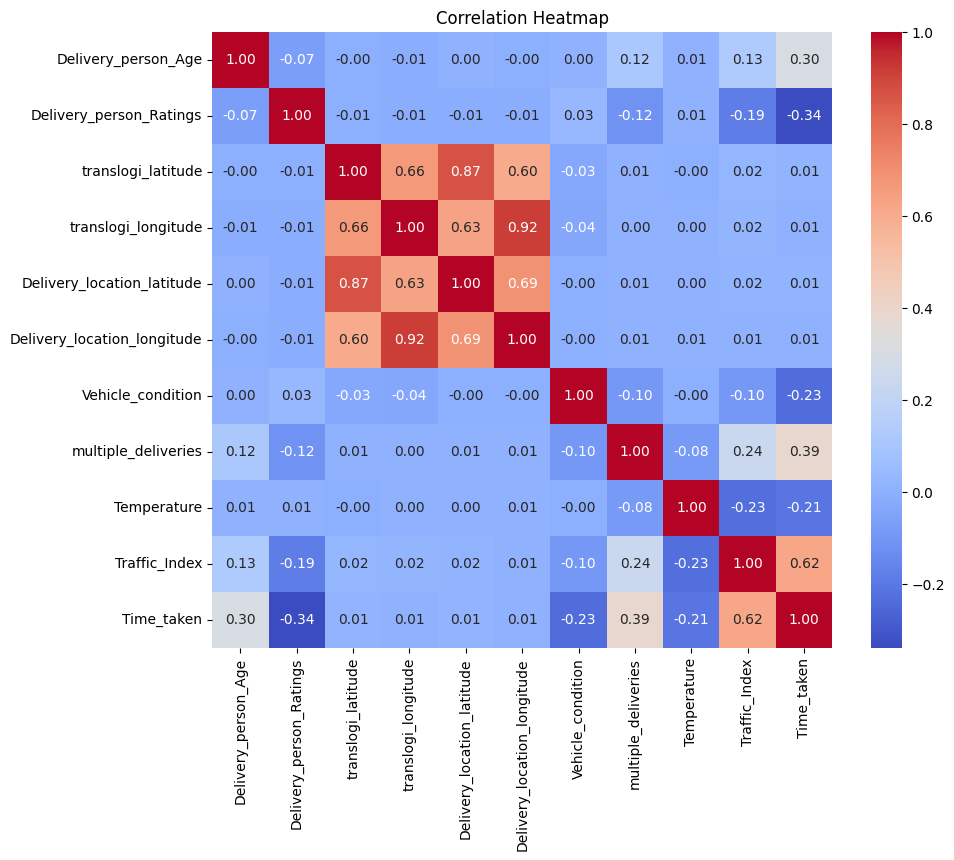

In [18]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

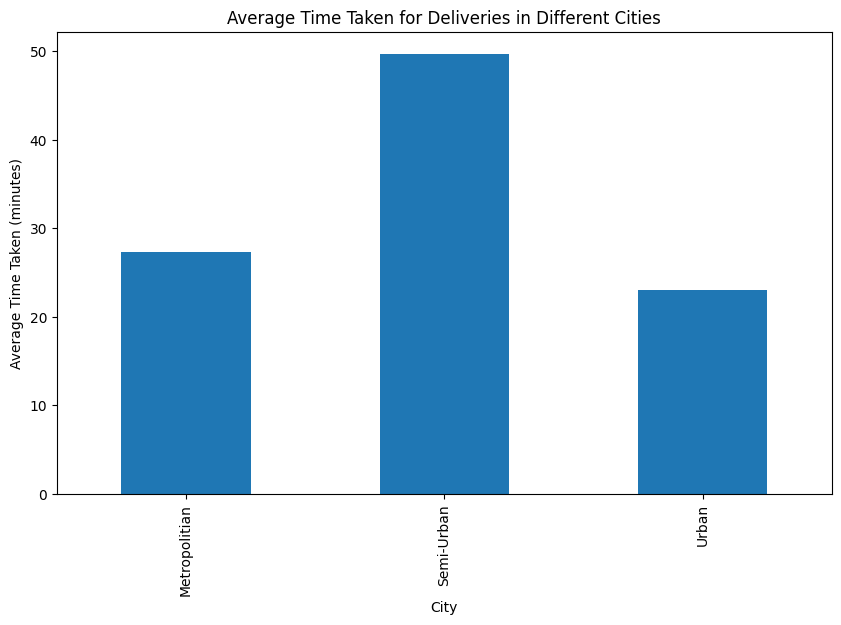

In [20]:
plt.figure(figsize=(10, 6))
df.groupby('City')['Time_taken'].mean().plot(kind='bar')
plt.title('Average Time Taken for Deliveries in Different Cities')
plt.xlabel('City')
plt.ylabel('Average Time Taken (minutes)')
plt.show()

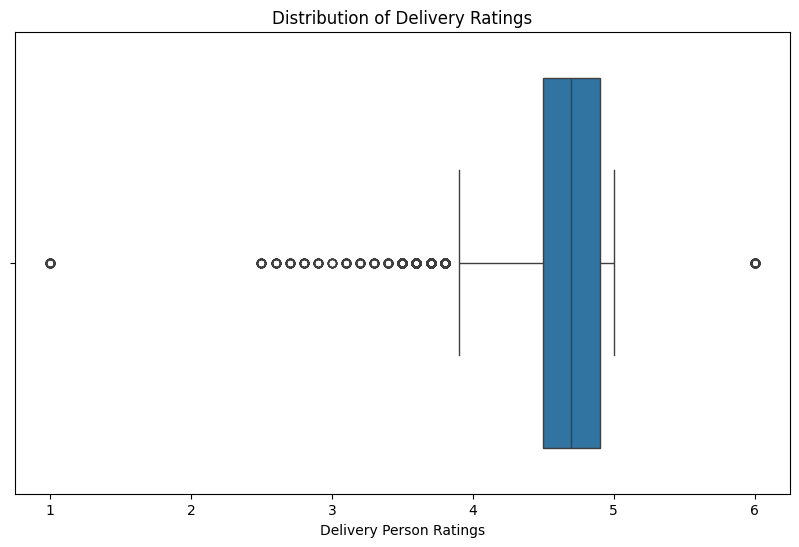

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delivery_person_Ratings', data=df)
plt.title('Distribution of Delivery Ratings')
plt.xlabel('Delivery Person Ratings')
plt.show()

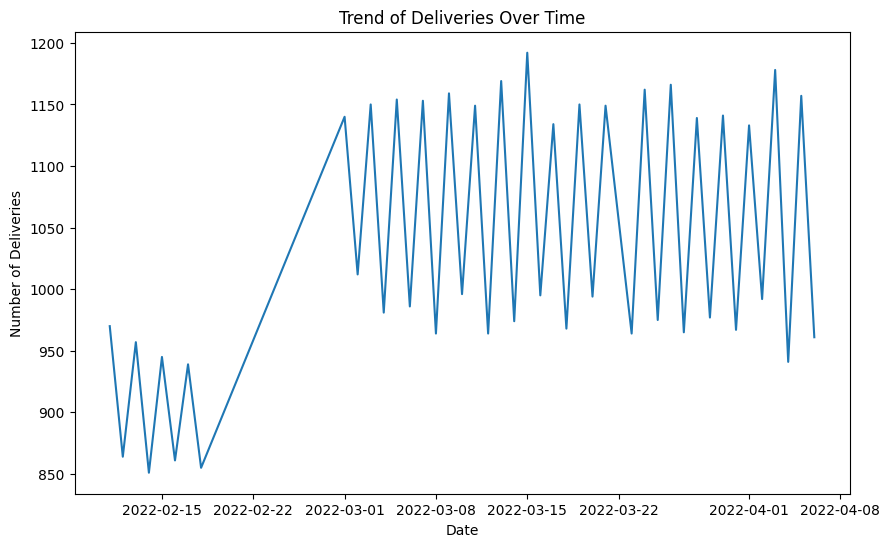

In [22]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

plt.figure(figsize=(10, 6))
df.groupby(df['Order_Date'].dt.date).size().plot(kind='line')
plt.title('Trend of Deliveries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deliveries')
plt.show()

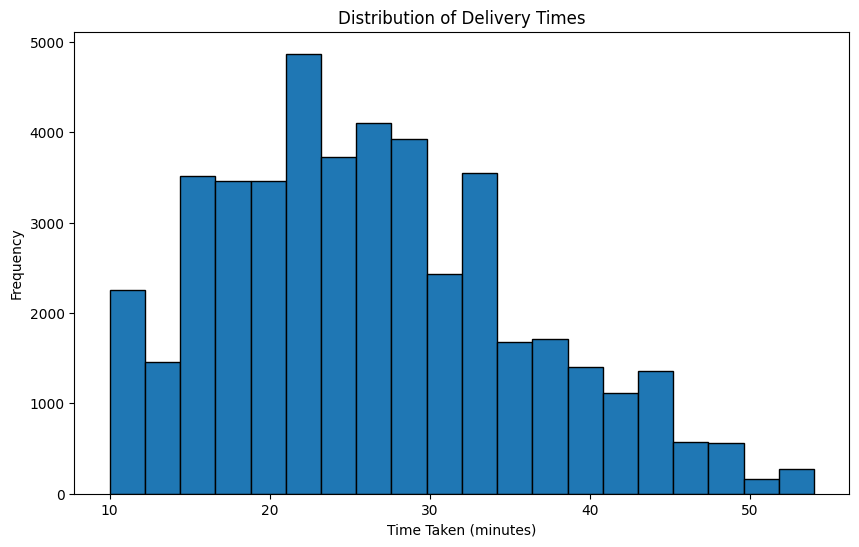

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['Time_taken'], bins=20, edgecolor='k')
plt.title('Distribution of Delivery Times')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

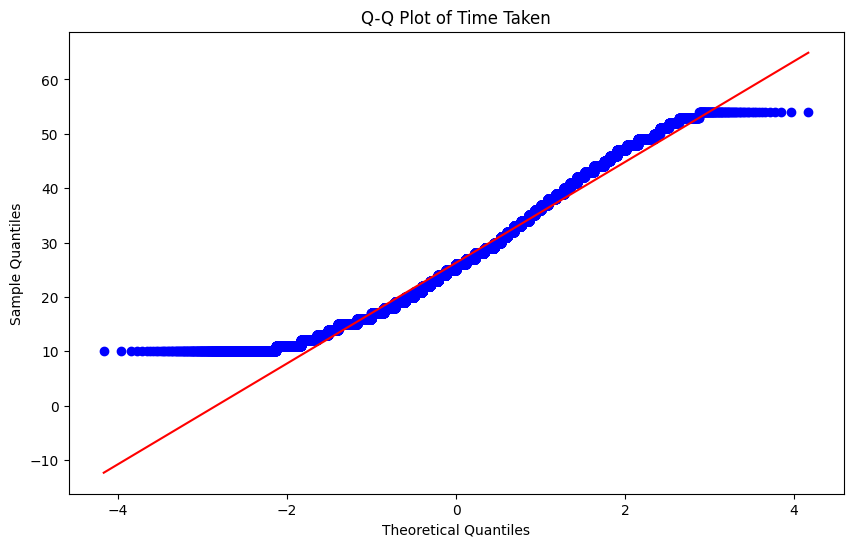

In [30]:
plt.figure(figsize=(10, 6))
stats.probplot(df['Time_taken'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Time Taken')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()